In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
f=pd.read_csv("20_years_data.csv")
df=pd.DataFrame(f,index = [x for x in range (0,f.shape[0])])
df = df[np.isfinite(df['PX_CLOSE_1D'])]
df=df.drop("BEST_DIV_YLD",axis=1)
df=pd.DataFrame(df,index = [x for x in range (0,df.shape[0])])
df['index']=df.index
df=df.dropna(how='any')
print (df.isnull().sum())
print (df.head())

Date                    0
PX_LOW                  0
PX_HIGH                 0
PX_VOLUME               0
PX_OPEN                 0
PX_CLOSE_1D             0
BEST_PE_RATIO           0
CUR_MKT_CAP             0
BETA_ADJ_OVERRIDABLE    0
index                   0
dtype: int64
     Date  PX_LOW  PX_HIGH    PX_VOLUME  PX_OPEN  PX_CLOSE_1D  BEST_PE_RATIO  \
0  1/2/97  729.55   742.81  374804416.0   740.74       740.74        15.7963   
1  1/3/97  737.01   748.24  350120512.0   737.01       737.01        16.0770   
2  1/6/97  743.82   753.31  417856896.0   748.03       748.03        16.0817   
3  1/7/97  742.18   753.26  407369216.0   747.65       747.65        16.2128   
4  1/8/97  747.71   755.72  409502016.0   753.23       753.23        16.1025   

   CUR_MKT_CAP  BETA_ADJ_OVERRIDABLE  index  
0          0.0                  0.92      0  
1          0.0                  0.92      1  
2          0.0                  0.92      2  
3          0.0                  0.92      3  
4          0.0  

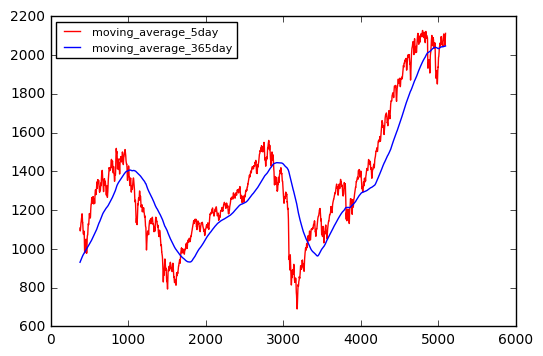

In [2]:
data_mean_5day=df['PX_OPEN'].rolling(window=5,center=False).mean()
data_mean_365day=df['PX_OPEN'].rolling(window=365,center=False).mean()
data_used_for_comparsion_365=data_mean_365day[365:len(data_mean_365day)]
data_used_for_comparsion_5=data_mean_5day[365:len(data_mean_5day)]
plt.plot(df['index'][365:len(data_mean_365day)],data_used_for_comparsion_5,c='red')
plt.plot(df['index'][365:len(data_mean_365day)],data_used_for_comparsion_365,c='blue')
plt.legend(['moving_average_5day','moving_average_365day'],loc=2,prop={'size':8})
plt.show()

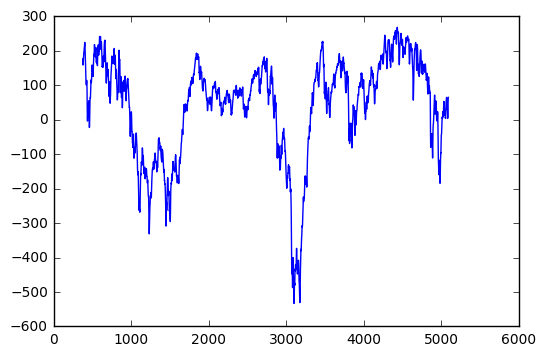

In [3]:
spread_between_5day_and_365day=data_used_for_comparsion_5-data_used_for_comparsion_365
plt.plot(spread_between_5day_and_365day.index,spread_between_5day_and_365day)
plt.show()
timespot=[x for x in spread_between_5day_and_365day.index if spread_between_5day_and_365day.loc[x]<=10 and spread_between_5day_and_365day.loc[x]>=-10]
potential_trading_chance=spread_between_5day_and_365day[timespot]
    

## Hodrick-Prescott filter

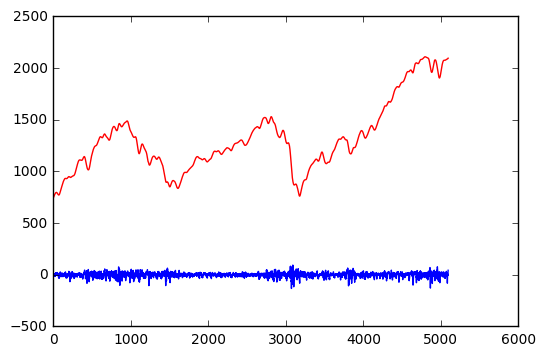

0       -5.762584
1      -11.453852
2       -2.394545
3       -4.732940
4       -1.107075
5       -7.874517
6       -3.372721
7       -0.648354
8       -2.547746
9        4.912838
10       1.387387
11       2.099398
12       6.712233
13       5.469039
14       9.752295
15      11.563933
16       1.204909
17      -7.424978
18     -14.506048
19     -16.047880
20     -10.068601
21       0.145266
22       0.728205
23      -0.055316
24       1.179102
25     -11.034140
26     -10.330758
27      -2.015364
28      -7.161537
29      -3.932655
          ...    
5063    20.520873
5064    13.793329
5065    17.045170
5066    22.913711
5067    19.214566
5068    28.141055
5069    30.284576
5070    32.873717
5071    26.474032
5072     8.357792
5073    -7.025382
5074    -6.356703
5075   -17.886682
5076    -6.355195
5077    -9.310330
5078    -0.069537
5079     4.080663
5080     6.673757
5081    17.172823
5082   -55.759727
5083   -81.183200
5084   -45.881326
5085   -16.189717
5086     9.130604
5088     3

In [28]:
import statsmodels.api as sm
PX_OPEN=df['PX_OPEN']
cycle,trend=sm.tsa.filters.hpfilter(PX_OPEN,lamb=10000)
plt.plot(df['index'],trend,c='red')
plt.plot(df['index'],cycle,c='blue')
plt.show()
print (cycle)